In [2]:
%load_ext autoreload
%autoreload 2

import os
from generate_data import parse_options


from sympdesuite.utils import load_obj
from sympdesuite.viz import plot_1ds
from sympdesuite.pdes import PDEs


In [3]:
pdes = PDEs()

args = parse_options(notebook=True)

## Load to verify

In [13]:
data = []

for pde_name, pde_str in pdes.items():
    us, dxs, dts = d = load_obj(os.path.join(args.data_dir, 'train', f'{pde_name}'))

    l0 = 0
    data.append([us[l0], dxs[l0], dts[l0], rf'{pde_name}:  {pde_str}'])

    # l = 3
    # plot_1ds(us[:l], dxs[:l], dts[:l], nrows = 1, ncols = 3, title = rf'{pde_name}:  {pde_str}', figsize = (3,2))


## Plot and save all

In [14]:
from matplotlib import pyplot as plt
from sympdesuite.coords import d_to_LT

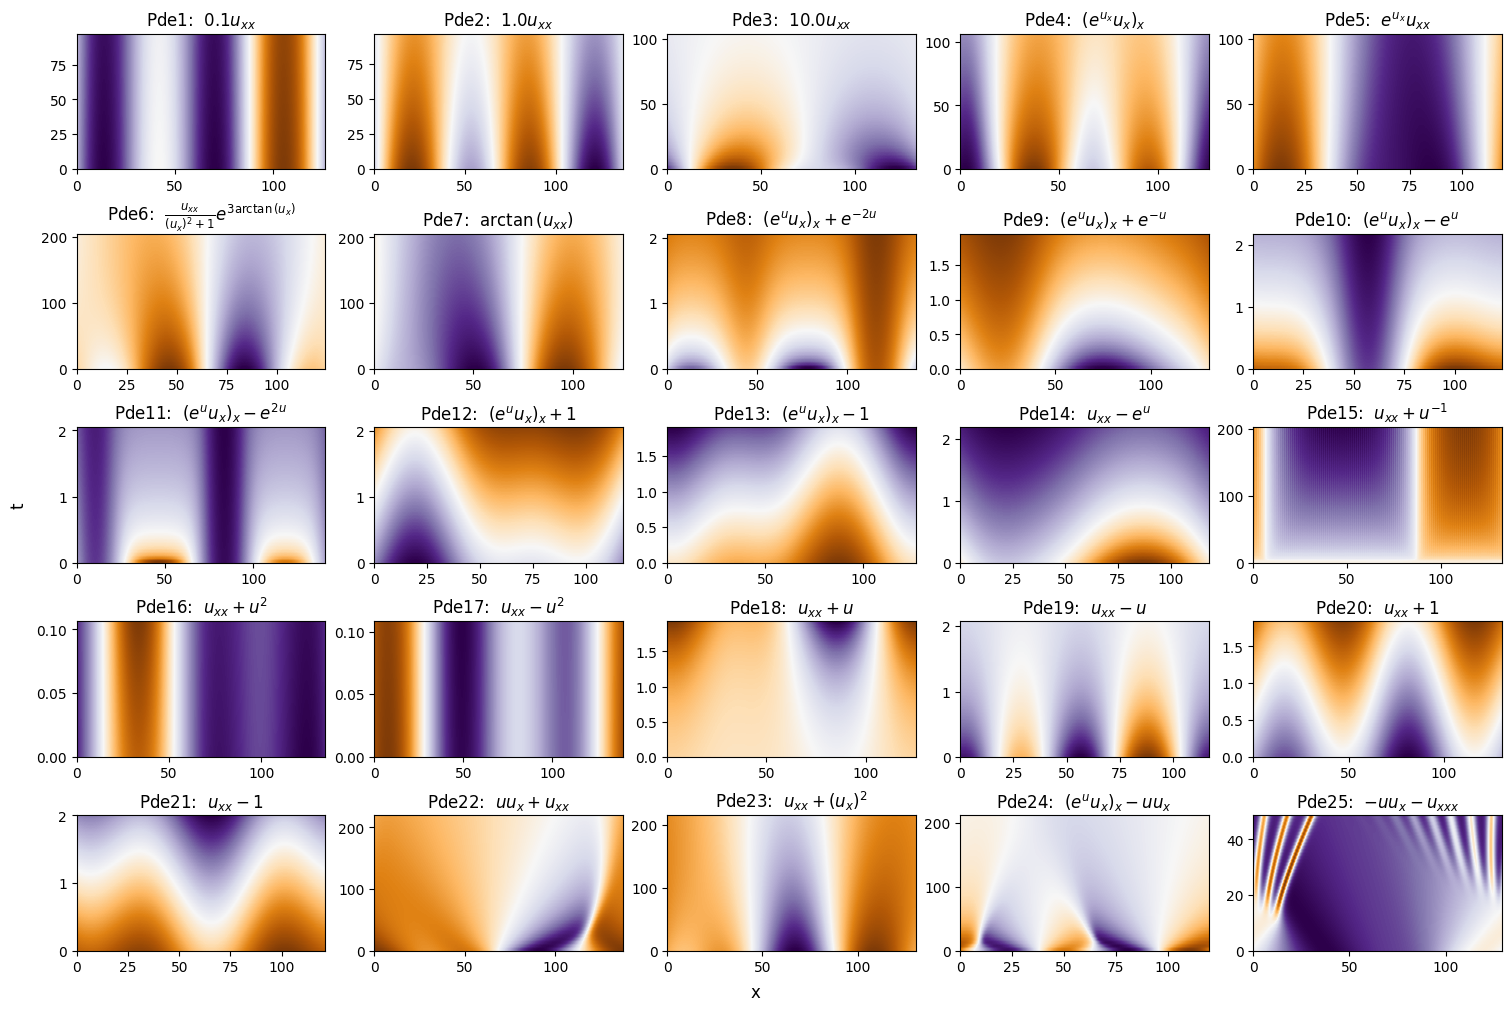

In [19]:
nrows, ncols = 5, 5
assert nrows * ncols == len(data)

fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*3, nrows*2), constrained_layout=True)
axs = axs.flatten()

for i, (ax, (u, dx, dt, title)) in enumerate(zip(axs, data)):
    L, T = d_to_LT(u, dx, dt)
    im = ax.imshow(u, origin = 'lower', extent=[0,L,0,T], cmap='PuOr_r', aspect='auto')
    ax.tick_params(axis='both', which='major')
    ax.tick_params(axis='both', which='minor')
    ax.set_title(title)

    fig.supxlabel('x')
    fig.supylabel('t')

fig.supxlabel('x')
fig.supylabel('t')
plt.show()

def savefig(fig: plt.figure, name: str, subdir: str = '', path: str = '/Users/elias/EliasMBA/Projects/Uni/Thesis/ai_thesis/figures/code', tight_layout = True,bbox_inches='tight', **kwargs):
    """
    fig (plt.figure): figure object to save
    name (str): name of the file
    subdir (str): subdirectory to save the file in
    path (str): path to save the file in (default: '/Users/elias/EliasMBA/Projects/Uni/Thesis/ai_thesis/figures/code')
    
    
    """
    # if not hasattr(kwargs, 'dpi'): kwargs['dpi'] = fig.dpi
    os.makedirs(os.path.join(path, subdir), exist_ok = True)
    fig.savefig(os.path.join(path, subdir, f'{name}.png'), bbox_inches=bbox_inches, **kwargs)

savefig(fig, 'pde_examples', '3-pde')

